In [31]:

from helpers.data import X
# from torchShiftAAregInit import torchShiftAAregInit
import torch
from torchShiftAADiscTau import torchShiftAADisc
from torchAA import torchAA
from torchNMF import NMF
from ShiftNMFDiscTau import ShiftNMF as ShiftNMF

import matplotlib.pyplot as plt
import numpy as np


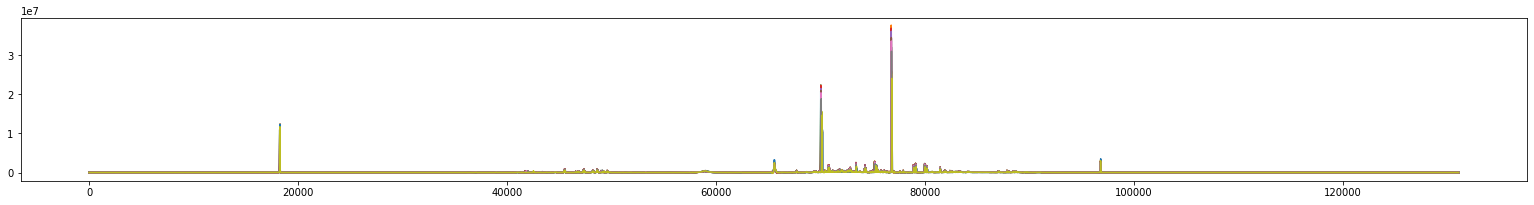

In [3]:
lim = (76700,77000)
# X = X.T[15000:80000]
# X=X.T
plt.rcParams["figure.figsize"] = (27,3)
plt.plot(X.T)

# X = X.T[68000:80500]

plt.show()

In [4]:
X.shape

(29, 131072)

In [5]:
rank = 3

In [6]:
reg_AA = torchAA(X, rank, lr=0.3)
C_reg, S_reg = reg_AA.fit(verbose=True)

Early stopping triggeredriance: 0.8665915923905898


In [64]:
AA = torchShiftAADisc(X, rank, lr=0.3)

# AA.C_tilde = reg_AA.C
# AA.S_tilde = reg_AA.S

C, S, tau = AA.fit(verbose=True, tau_thres=1e-5)


In [ ]:
recon = AA.recon.detach().resolve_conj().numpy()
A = torch.fft.ifft(AA.A_F).detach().numpy()

CX = A
SCX = recon

recon_no_shift_AA = np.matmul(S,A)


c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


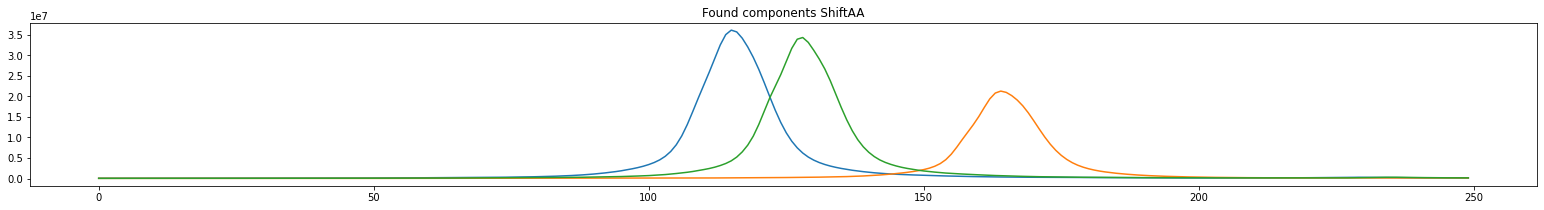

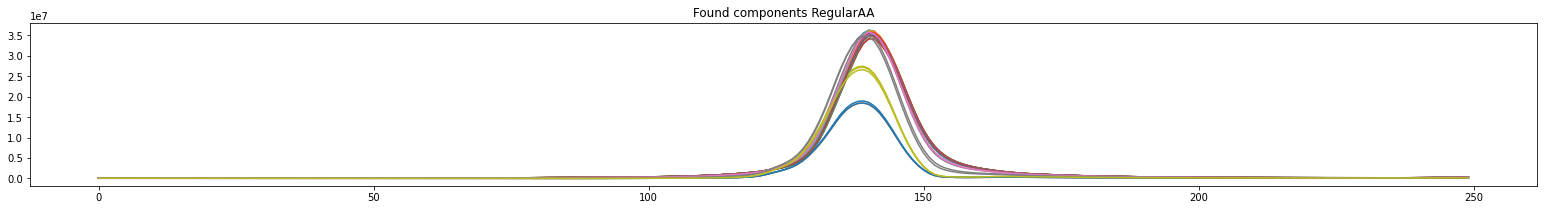

In [ ]:

# for signal in CX:
#     plt.plot(signal)
plt.plot(CX.T[76650:76900])
plt.title("Found components ShiftAA")
plt.show()
plt.plot(recon_no_shift_AA.T[76650:76900])
plt.title("Found components RegularAA")
plt.show()

c:\Users\lucas\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


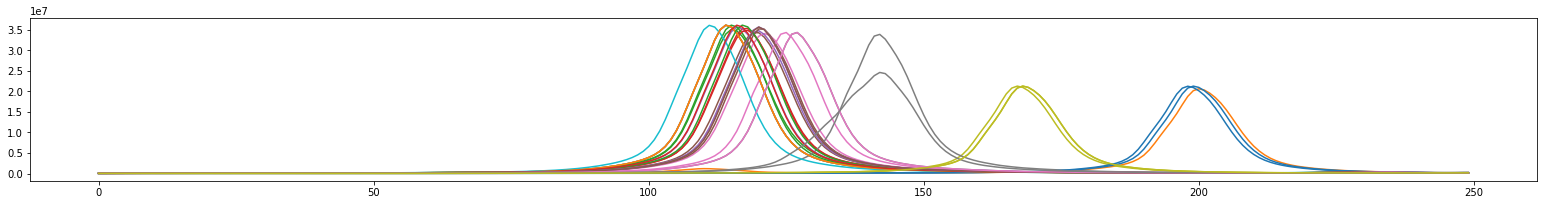

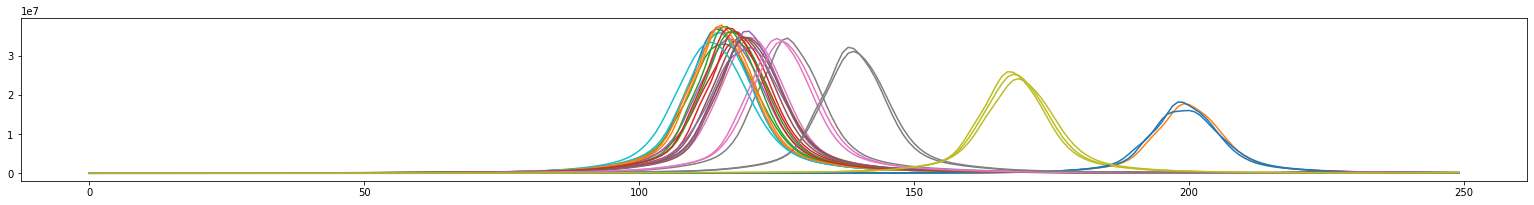

In [26]:


# lim = (0,125000)

plt.plot(recon.T[76650:76900])
#change figure size
plt.show()

plt.plot(X.T[76650:76900])
plt.show()

In [38]:
reg_nmf = NMF(X, rank, lr=0.3)
W, H = reg_nmf.fit(verbose=True)

KeyboardInterrupt: 

In [36]:
s_nmf = ShiftNMF(X, rank, lr=0.3)
W, H, tau_shift = s_nmf.fit(verbose=True, tau_thres=1e-5)

Early stopping triggered74951643110135, Tau: 216.79945373535156


(29, 250)
tensor(374203.9425, dtype=torch.float64)


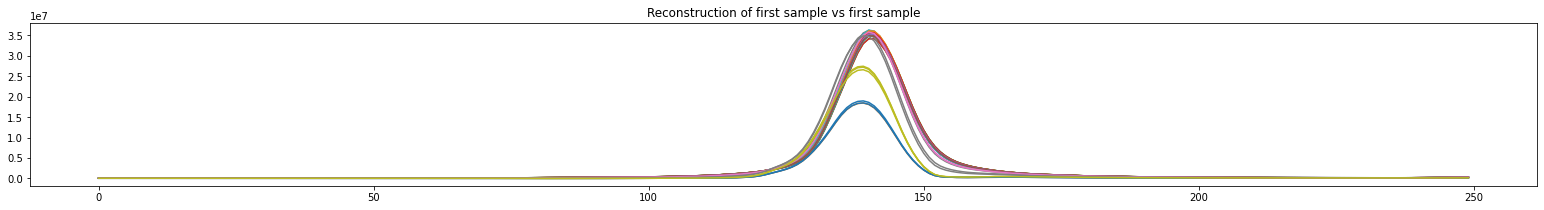

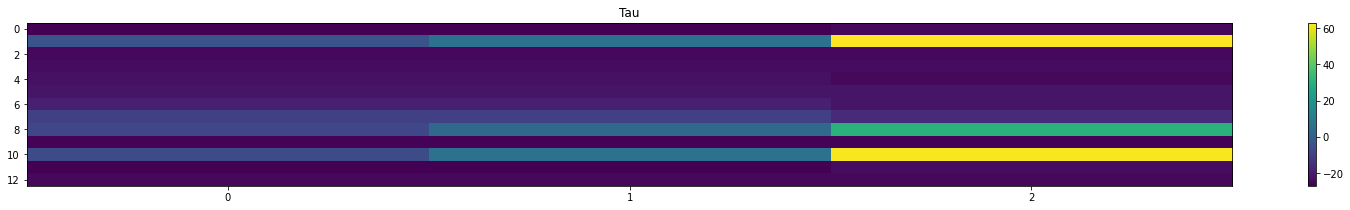

In [61]:
recon = s_nmf.recon.detach().numpy()
recon_no_shift = np.matmul(W,H)
print(recon.T[76650:76900].T.shape)
print(s_nmf.std)
# for signal in H:
#     plt.plot(signal)
# plt.title("Found components shift NMF")
# plt.show()
plt.plot(recon_no_shift.T[76650:76900])
# plt.show()
# plt.plot(X[1])
plt.title("Reconstruction of first sample vs first sample")
plt.show()

plt.figure()
plt.imshow(tau_shift[:13], aspect='auto', interpolation="none")
ax = plt.gca()
ax.set_xticks(np.arange(0, 3, 1))
plt.colorbar()
plt.title("Tau")
plt.show()